# Model Exploration
This objective of this project is to evaluates 3 approaches to accurately analyze real-world data: a naive approach, a non deep learning approach, and a neural network-based deep learning approach

In [1]:
# Imports
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Load Data
train_df = pd.read_csv('./data/processed/train.csv')
val_df = pd.read_csv('./data/processed/val.csv')
test_df = pd.read_csv('./data/processed/test.csv')


medical_conditions = train_df['medical_condition'].unique()
label_to_id = {}
for idx, condition in enumerate(medical_conditions):  # Loop over all unique medical conditions
    label_to_id[condition] = idx  # Assign a unique numeric ID to each condition

train_df['label'] = train_df['medical_condition'].map(label_to_id)
val_df['label'] = val_df['medical_condition'].map(label_to_id)
test_df['label'] = test_df['medical_condition'].map(label_to_id)

In [3]:
warnings.filterwarnings('ignore', category=UserWarning)

# Naive Approach
Predicts the most common medical condition in the dataset

In [4]:
def run_naive_baseline(train_df, test_df):
    '''
    Functtion to predict the most common medical condition in the training set for all test samples
    '''
    most_common = train_df['medical_condition'].mode()[0] # Most common condition in training set
    print(f"Most common medical condition in training set: {most_common}")
    predictions = [most_common] * len(test_df) # Predict that condition for all test rows

    return predictions

In [5]:
preds = run_naive_baseline(train_df, test_df)
y_true = test_df['medical_condition']

Most common medical condition in training set: Diabetes(Type 1)


In [6]:
# Evaluation metrics
accuracy = accuracy_score(y_true, preds)
precision = precision_score(y_true, preds, average='macro', zero_division=0)
recall = recall_score(y_true, preds, average='macro', zero_division=0)
f1 = f1_score(y_true, preds, average='macro', zero_division=0)

print('Accuracy:', round(accuracy, 4))
print('Precision):', round(precision, 4))
print('Recall:', round(recall, 4))
print('F1 Score:', round (f1, 4))

print('Classification Report:')
print(classification_report(y_true, preds, zero_division=0))

Accuracy: 0.0851
Precision): 0.0025
Recall: 0.0294
F1 Score: 0.0046
Classification Report:
                  precision    recall  f1-score   support

            ADHD       0.00      0.00      0.00         2
        AIDS/HIV       0.00      0.00      0.00         1
            Acne       0.00      0.00      0.00         1
       Allergies       0.00      0.00      0.00         1
      Alzheimers       0.00      0.00      0.00         2
          Angina       0.00      0.00      0.00         1
Bipolar Disorder       0.00      0.00      0.00         2
          Cancer       0.00      0.00      0.00         2
      Chickenpox       0.00      0.00      0.00         2
     Colds & Flu       0.00      0.00      0.00         1
    Constipation       0.00      0.00      0.00         1
          Dengue       0.00      0.00      0.00         1
Diabetes(Type 1)       0.09      1.00      0.16         4
        Diarrhea       0.00      0.00      0.00         1
          Eczema       0.00      0.00 

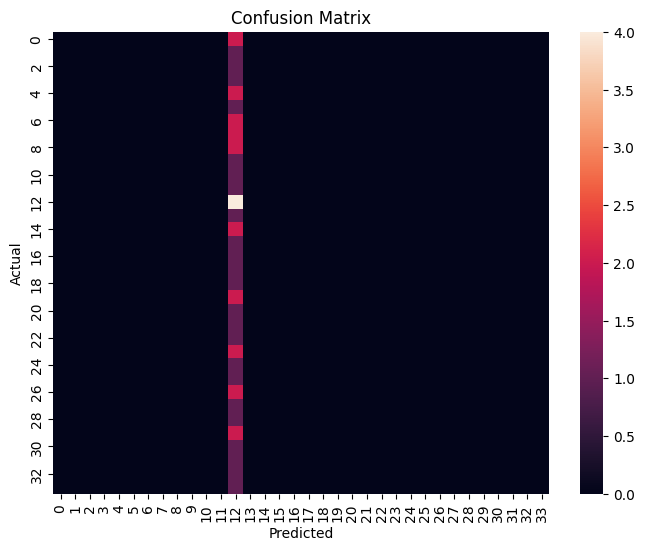

In [7]:
# Confusion matrix heatmap
cm = confusion_matrix(y_true, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classical Machine Learning Approach
Uses TF-IDF features of the symptoms text to train a logistic regression classifier

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # TF-IDF vectorization of symptoms
X_train = tfidf_vectorizer.fit_transform(train_df['symptoms'])
X_val = tfidf_vectorizer.transform(val_df['symptoms'])
X_test = tfidf_vectorizer.transform(test_df['symptoms'])

y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds, average='macro', zero_division=0)
recall = recall_score(y_test, test_preds, average='macro', zero_division=0)
f1 = f1_score(y_test, test_preds, average='macro', zero_division=0)

print('Accuracy:', round(accuracy, 4))
print('Precision:', round(precision, 4))
print('Recall:', round(recall, 4))
print('F1 Score:', round(f1, 4))
print('Classification Report:')
print(classification_report(y_test, test_preds, zero_division=0))

Accuracy: 0.1702
Precision: 0.0695
Recall: 0.1154
F1 Score: 0.0816
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.21      1.00      0.35         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.50      1.00      0.67         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00  

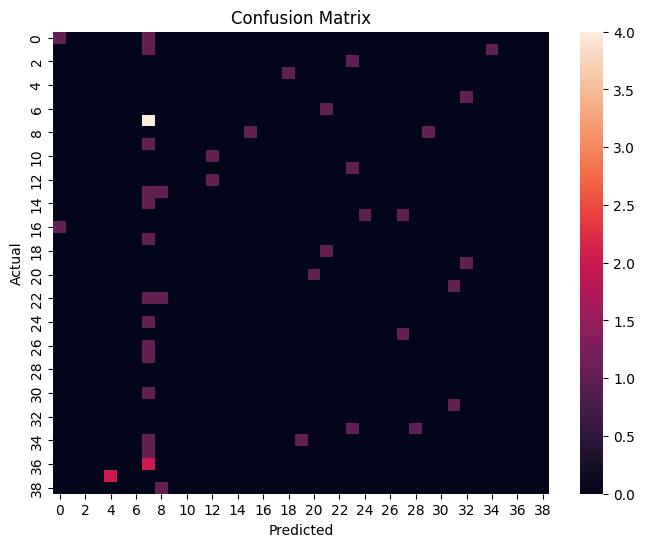

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Network-based Deep Learning Approach
Fine-tunes a BERT text classification model to map symptoms to conditions